# Figures for the paper

In [2]:
from scipy.integrate import quad
from numpy import *
from matplotlib.pylab import *
import matplotlib as mpl
%matplotlib inline

In [3]:
import PIL.Image as Image
import pickle

In [4]:
def plot_trace(data,t,ax=None,c='C0',band= None):
    if ax is None:
        ax = gca()
    vtracso = data*1.0
    vtracso.sort(axis=1)
    ax.plot(t,vtracso[:,250],c)
    if band == 0:
        pass
    elif band == 1:
        ax.fill_between(t,vtracso[:,79],vtracso[:,421],color=c,alpha=0.5)
    elif band ==2:
        ax.fill_between(t,vtracso[:,5],vtracso[:,495],color=c,alpha=0.2)
    else:
        ax.fill_between(t,vtracso[:,5],vtracso[:,495],color=c,alpha=0.2)
        ax.fill_between(t,vtracso[:,79],vtracso[:,421],color=c,alpha=0.5)
    return(ax)

In [5]:
from matplotlib.patches import ConnectionPatch

In [845]:
#with open("../SpineModel/STDP_baseline.pickle","rb") as f:
with open("/mnt/data/STDP_baseline_ths.pickle","rb") as f:
    fweights,data,dcs,fcat,dis = pickle.load(f)

In [846]:
tdels = [-100,-75,-50,-30,-20,-15,-10,-7.5,-5,-3.5,-2,-1,-0.5,0,0.5,1.0,2.0,2.75,3.5,5.0,7.5,10.0,15.0,20.,30.,50,75,100]

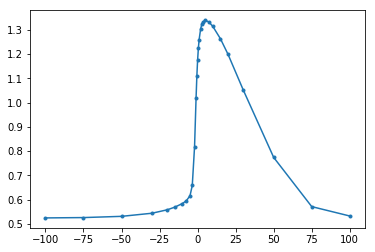

In [143]:
plot(tdels,data[:,4],'.-')
#plot(tdels,data[:,5],'.-')

#fill_between(tdels,data[:,4]+data[:,4+3],data[:,4]+data[:,4-3])

In [341]:
tdels[19]

5.0

In [847]:
for fk in fweights.keys():
    thks = list(fweights[fk].keys())
    break

In [155]:
def wdt(i,th1th2,corrected = False):
    a = [[fk,fweights[fk][th1th2][0][i],fweights[fk][th1th2][1][i]] for fk in fweights.keys()]
    a = array(a)
    if corrected:
        a[:,1] = a[:,1]-a[0,1]
    return(a)

In [549]:
wt[:,2]*0.05

array([32.2 , 32.4 , 33.  , 34.55, 36.1 , 37.2 , 38.6 , 39.5 , 41.05,
       43.65, 48.15, 50.15, 50.75, 51.  , 51.05, 50.95, 50.6 , 50.2 ,
       49.7 , 48.7 , 46.95, 45.6 , 46.6 , 47.95, 51.  , 50.35, 38.1 ,
       32.15])

In [634]:
def stdpalt(wt, dt = 0.05,gd = 300,gp=700, n = 100):
    gpgd = gp/gd
    
    wf = 0.5
    
    wd = wt[:,1]*n*dt*gd
    wp = wt[:,2]*n*dt*gp
    w = where(wp>0,wp/(wd+wp),0.5*exp(-wt[:,1]*n*dt*gd/20.0/150e3))
    w = w-w[0]
    return(w)


In [304]:
def stdp(wt, A = 500.0):
    r = where(wt[:,1]>0,wt[:,2]/wt[:,1],0.0)
    sel = ~((wt[:,2]>0)*(wt[:,1]>0))
    r[sel] = -wt[sel,1]/A
    r = (r-r[0])
    #r = r/abs(r).max()
    return(r)



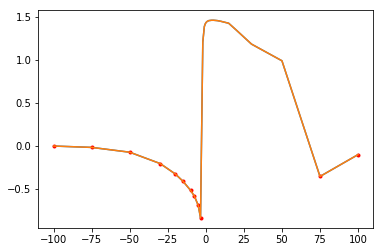

In [562]:
i = randint(500)
ths = (0.35,0.55)
wt = wdt(i,ths)
rp = stdp(wt)
r = where(wt[:,1]>0,wt[:,2]/wt[:,1],0.0)
sel = ~((wt[:,2]>0)*(wt[:,1]>0))
r[sel] = -wt[sel,1]/500.0
plot(wt[:,0],(r-r[0]))
plot(wt[sel,0],(r[sel]-r[0]),'r.')

plot(wt[:,0],rp)

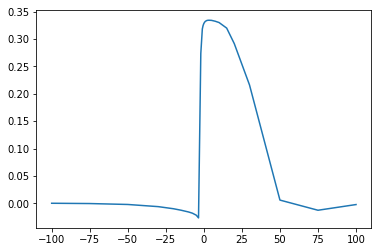

In [615]:
i = randint(500)
ths = (0.35,0.55)
wt = wdt(i,ths)
plot(wt[:,0],stdpalt(wt))

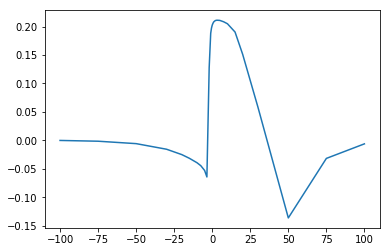

In [632]:
plot(wt[:,0],stdpalt(wt,gd = 300,gp=700))

/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


Text(0, 0.5, 'dw')

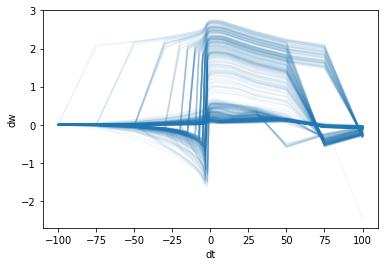

In [351]:
i = randint(500)
figure()
ths = (0.3,0.5)
for i in range(500):
    wt = wdt(i,ths)
    rp = stdp(wt)
    plot(wt[:,0],rp,'C0-',alpha=0.05)
xlabel('dt')
ylabel('dw')


/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


Text(0, 0.5, 'dw')

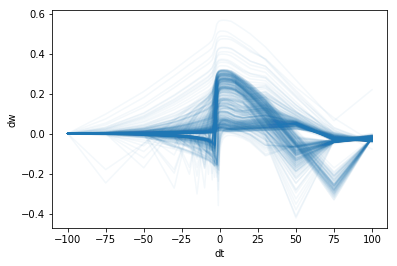

In [633]:
i = randint(500)
figure()
ths = (0.3,0.5)
for i in range(500):
    wt = wdt(i,ths)
    rp = stdpalt(wt,gd = 300,gp=700)
    plot(wt[:,0],rp,'C0-',alpha=0.05)
xlabel('dt')
ylabel('dw')

/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


Text(0, 0.5, 'dw')

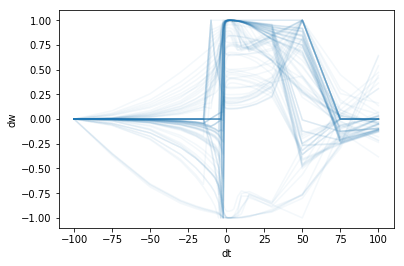

In [346]:
i = randint(500)
i = 239
figure()
ths = (0.3,0.55)
for ths in thks:
    wt = wdt(i,ths)
    rp = stdp(wt)
    plot(wt[:,0],rp/abs(rp).max(),'C0',alpha=0.05)
xlabel('dt')
ylabel('dw')


/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


Text(0, 0.5, 'dw')

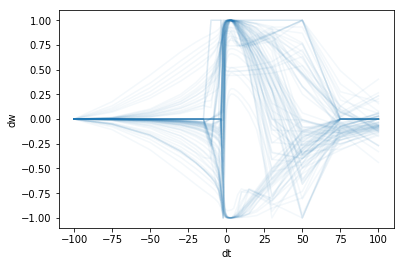

In [635]:
i = randint(500)
i = 239
figure()
ths = (0.3,0.55)
for ths in thks:
    wt = wdt(i,ths)
    rp = stdpalt(wt)
    plot(wt[:,0],rp/abs(rp).max(),'C0',alpha=0.05)
xlabel('dt')
ylabel('dw')

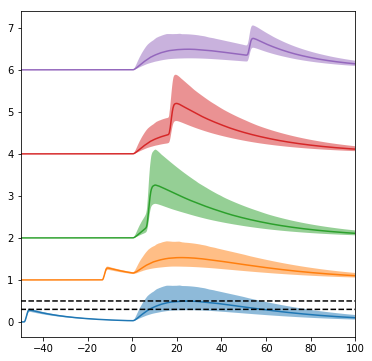

In [662]:
figure(figsize=(6,6))
tdelp = [-50,-15,5,15.0,50]
hi = [0,1,2,4.,6.,7.0]
t0 = 300
#fig,ax = subplots(nrows=7,ncols=4,figsize=(14,7*3))
for i,td in enumerate(tdelp):
    d = fcat[td]
    #ax[iy,ix].
    plot(d[:,0]-t0,d[:,1]+hi[i])
    #ax[iy,ix].plot(array(trec)-toffset-ton,ctracso[:,25],'C0-')
    #ax[iy,ix].
    fill_between(d[:,0]-t0,d[:,2]+hi[i],d[:,3]+hi[i],alpha=0.5)
xlim(250-t0,400-t0)
plot(d[:,0]-t0,d[:,0]*0+.5,'k--')
plot(d[:,0]-t0,d[:,0]*0+.3,'k--')


In [490]:
def signchanges(x):
    s0 = sign(x[1])
    i = 0
    while s0==0 and i<len(x):
        s0 = sign(x[i])
        i += 1
    if i==len(x):
        return(zeros((1,3)))
        
    sel = arange(len(x)-1)[(x[1:]*x[:-1])<0]
    res = column_stack((concatenate(([i],sel)),ones(len(sel)+1)))
    if abs(s0)>0:
        res[arange(0,res.shape[0],2),1] = s0
        res[arange(1,res.shape[0],2),1] = -s0
    else:
        print('hello?')

    return(res)
def labeld(x):
    l = ''
    for xt in x:
        if xt==-1:
            l += 'D'
        elif xt == 1:
            l +='P'
    return(l)

In [473]:
st = signchanges(rp)
labeld(st[:,1])

/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


'DPD'

In [387]:

labels = [labeld(signchanges(stdp(wdt(i,ths)))[:,1]) for i in range(500)]

/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [393]:
labelsn = array(labels)
labelsn[labelsn=='PD'] = 1
labelsn[labelsn=='DPD'] = 0
labelsn[labelsn=='DP'] = 2
labelsn = array(labelsn,dtype=int)

In [410]:
dis.keys()

dict_keys(['#Bch', 'Dsb', 'Dss', 'd_interSp', 'Vtot', 'Vh', 'Ln', 'SA', 'nPSD', 'A1', 'A2', 'GPHN SNR', 'DiS-EMchk', 'Lneck', 'maxDneck', 'minDneck', 'meanDneck', 'Rneck', 'Lhead', 'maxDhead', 'minDhead', 'meanDhead', 'Ah', 'Rhead', 'L', 'D', 'AhA0'])

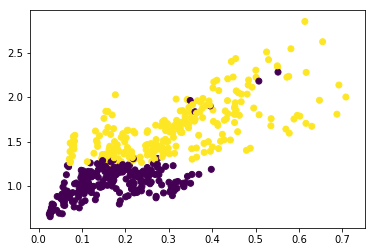

In [415]:
scatter(dis['A1'],dcs[19,:],c=labelsn)

In [421]:
i = 0

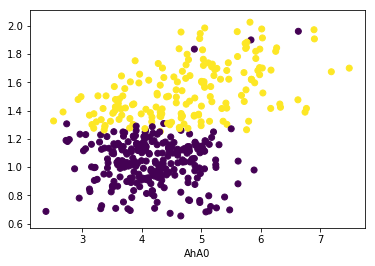

In [449]:
keys = list(dis.keys())
sel = dis['A1']<.4
scatter(dis[keys[i]][sel],dcs[19,sel],c=labelsn[sel])
xlabel(keys[i])
i +=1

/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


Text(0.5, 0, 'A2')

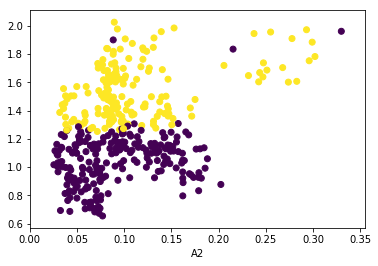

In [443]:
keys = list(dis.keys())
sel = (dis['A1']<.4)*(dis['minDhead']<180)
scatter(dis['A2'][sel],dcs[19,sel],c=labelsn[sel])
xlabel('A2')

/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


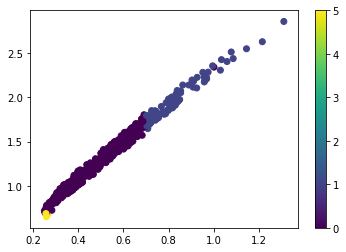

In [460]:
ths = (0.3,0.55)
ths = (0.3,0.70)

labels = [labeld(signchanges(stdp(wdt(i,ths)))[:,1]) for i in range(500)]

labelsn = array(labels)
labelsn[labelsn=='PD'] = 1
labelsn[labelsn=='DPD'] = 0
labelsn[labelsn=='DP'] = 2
labelsn[labelsn=='DPDP'] = 3
labelsn[labelsn=='PDPD'] = 4
labelsn[labelsn=='D'] = 5

labelsn = array(labelsn,dtype=int)

scatter(dcs[0,:],dcs[19,:],c=labelsn)
colorbar()

In [848]:
ths = (0.3,0.70)

dd = zeros((len(thks),3))
for k,ths in enumerate(thks):
    labels = [labeld(signchanges(stdp(wdt(i,ths)))[:,1]) for i in range(500)]

    labelsn = array(labels)
    dd[k,:] =concatenate((ths,[(labelsn=='DPD').sum()/500.0]))
    

KeyboardInterrupt: 

In [ ]:
scatter(dd[:,0],dd[:,1],c=dd[:,2])
colorbar()

In [857]:
ths = (0.3,0.70)

sls = []
dd = zeros((len(thks),3))
for k,ths in enumerate(thks):
    labels = [labeld(signchanges(stdpalt(wdt(i,ths)))[:,1]) for i in range(500)]
    sls.append(set(labels))

/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [859]:
slt = [list(sl) for sl in sls]

In [865]:
posSTDPs = list(set(concatenate(slt)))

In [866]:
posSTDPs

['',
 'P',
 'DP',
 'DPDP',
 'PDPD',
 'D',
 'PDPDPD',
 'PDPDPDPD',
 'PDPDP',
 'PDPDPDPDP',
 'DPD',
 'DPDPDPDPD',
 'PDP',
 'PDPDPDP',
 'DPDPD',
 'DPDPDPDP',
 'DPDPDP',
 'DPDPDPD',
 'PD']

In [867]:
ths = (0.3,0.70)

dd = {}

for poss in posSTDPs:
    dd[poss] = zeros((len(thks),3))
    
for k,ths in enumerate(thks):
    labels = [labeld(signchanges(stdpalt(wdt(i,ths)))[:,1]) for i in range(500)]

    labelsn = array(labels)
    for poss in posSTDPs:
        dd[poss][k,:] = concatenate((ths,[(labelsn==poss).sum()/500.0]))
    
    if k%50 == 0:
        with open("STDP_phdiagth1th2.pickle","wb") as f:
            pickle.dump(dd,f)
    

/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [868]:
with open("STDP_phdiagth1th2.pickle","wb") as f:
    pickle.dump(dd,f)

In [870]:
dd['DP']

array([[0.15 , 0.15 , 0.   ],
       [0.15 , 0.16 , 0.122],
       [0.15 , 0.17 , 0.136],
       ...,
       [0.94 , 0.92 , 0.02 ],
       [0.94 , 0.93 , 0.016],
       [0.94 , 0.94 , 0.   ]])

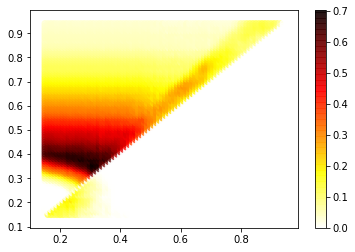

In [850]:
scatter(dd[:,0],dd[:,1],c=dd[:,2],cmap = 'hot_r',alpha=0.7)
colorbar()

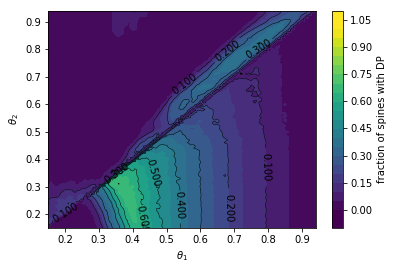

In [874]:
x,y,z = dd['DP'][:,0],dd['DP'][:,1],dd['DP'][:,2]
triang = matplotlib.tri.Triangulation(x, y)
TR = tricontour(x, y, z, arange(-0.,1.1,0.1), linewidths=0.5, colors='k')
clabel(TR, inline=1, fontsize=10)

tricontourf(x, y, z, arange(-0.1,1.1,0.05))
xlabel('$\\theta_1$')
ylabel('$\\theta_2$')
cb = colorbar()
clim(0,1)
cb.set_label('fraction of spines with DP')
#savefig('probDPcurve.png',dpi = 300)

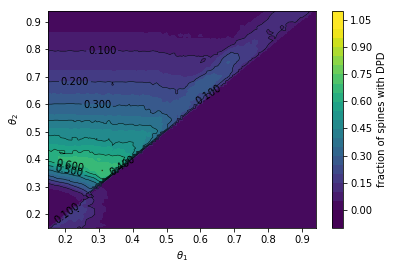

In [852]:
x,y,z = dd[:,0],dd[:,1],dd[:,2]
triang = matplotlib.tri.Triangulation(x, y)
TR = tricontour(x, y, z, arange(-0.,1.1,0.1), linewidths=0.5, colors='k')
clabel(TR, inline=1, fontsize=10)

tricontourf(x, y, z, arange(-0.1,1.1,0.05))
xlabel('$\\theta_1$')
ylabel('$\\theta_2$')
cb = colorbar()
clim(0,1)
cb.set_label('fraction of spines with DPD')
savefig('probDPcurve.png',dpi = 300)

In [853]:
ddDP = dd*1.0

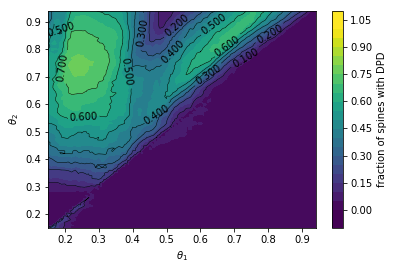

In [854]:
x,y,z = ddo[:,0],ddo[:,1],ddo[:,2]
triang = matplotlib.tri.Triangulation(x, y)
TR = tricontour(x, y, z, arange(-0.,1.1,0.1), linewidths=0.5, colors='k')
clabel(TR, inline=1, fontsize=10)

tricontourf(x, y, z, arange(-0.1,1.1,0.05))
xlabel('$\\theta_1$')
ylabel('$\\theta_2$')
cb = colorbar()
clim(0,1)
cb.set_label('fraction of spines with DPD')
savefig('probDPcurve.png',dpi = 300)

In [514]:
cm = get_cmap('cool')

In [515]:
x = dis['Vh']
x = (x-x.min())/(x.max()-x.min())

(-2, 3.5)

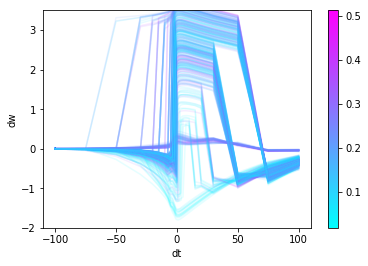

In [650]:
figure()
ths = (0.25,0.75)
for i in range(500):
    wt = wdt(i,ths)
    rp = stdp(wt)
    plot(wt[:,0],rp,c=cm(x[i]),alpha=0.1)
xlabel('dt')
ylabel('dw')
scatter(x*0,x*0-3,c = dis['Vh'],cmap=cm)
colorbar()
ylim(-2,3.5)


ValueError: 'c' argument has 500 elements, which is not acceptable for use with 'x' with size 6400, 'y' with size 6400.

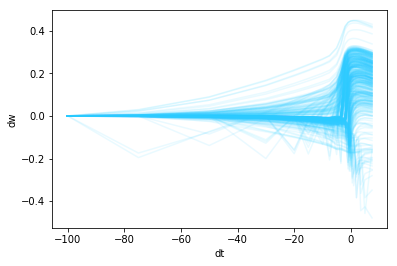

In [802]:
figure()
ths = (0.25,0.75)
for i in range(500):
    wt = wdt(i,ths)
    rp = stdpalt(wt)
    plot(wt[:,0],rp,c=cm(x[i]),alpha=0.1)
xlabel('dt')
ylabel('dw')
scatter(x*0,x*0-3,c = dis['Vh'],cmap=cm)
colorbar()
ylim(-.5,.5)


In [811]:
with open("STDP_inhibition_temp.pickle","rb") as f:
    fweights,fweightsdel,data,dcs,dis = pickle.load(f)

In [814]:
for fk in fweights.keys():
    thks = list(fweights[fk].keys())
    break

In [795]:
def wdti(i,th1th2,tinh = 0.0,corrected = False):
    a = [[fk,fweightsdel[(fk,tinh)][th1th2][0][i],fweightsdel[(fk,tinh)][th1th2][1][i]] for fk in fweights.keys()]
    a = array(a)
    if corrected:
        a[:,1] = a[:,1]-a[0,1]
    return(a)

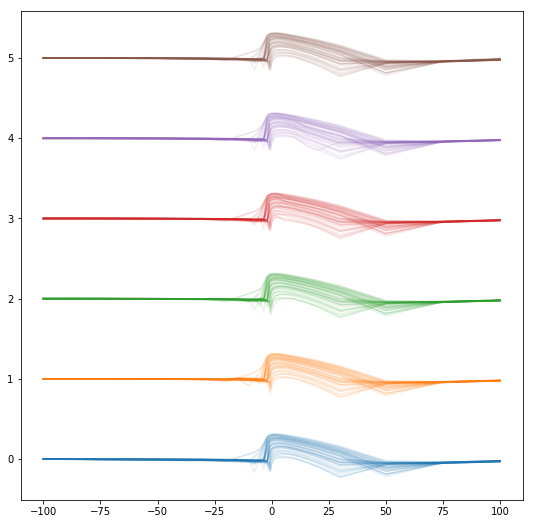

In [831]:
#fweightsdel[(tdels[0],tdels[4])][(th1,th2)]
figure(figsize=(9,9))
ths = (0.25,0.75)
labels = [labeld(signchanges(stdpalt(wdt(i,ths)))[:,1]) for i in range(500)]
labelsn = array(labels)
sel = labelsn=='DPD'

n0 = 50
for i in arange(500)[sel][:n0]:
    wt = wdti(i,ths,tinh = -100.0)
    rp = stdpalt(wt)
    plot(wt[:,0],rp,c='C0',alpha=0.1)
        
for i in arange(500)[sel][:n0]:
    wt = wdti(i,ths,tinh = -15.0)
    rp = stdpalt(wt)
    plot(wt[:,0],rp+1,c='C1',alpha=0.1)


for i in arange(500)[sel][:n0]:
    wt = wdti(i,ths,tinh = -5.0)
    rp = stdpalt(wt)
    plot(wt[:,0],rp+2,c='C2',alpha=0.1)
        

for i in arange(500)[sel][:n0]:
    wt = wdti(i,ths,tinh = 5.0)
    rp = stdpalt(wt)
    plot(wt[:,0],rp+3,c='C3',alpha=0.1)
        

for i in arange(500)[sel][:n0]:
    wt = wdti(i,ths,tinh = 15.0)
    rp = stdpalt(wt)
    plot(wt[:,0],rp+4,c='C4',alpha=0.1)
        

for i in arange(500)[sel][:n0]:
    wt = wdti(i,ths,tinh = 100.0)
    rp = stdpalt(wt)
    plot(wt[:,0],rp+5,c='C5',alpha=0.1)
        
        
savefig('STDPsdt.png',dpi = 300)

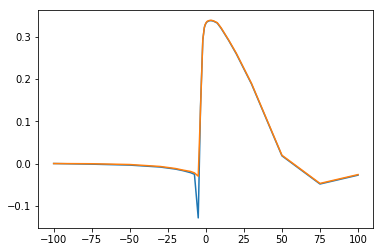

In [833]:
i =arange(500)[sel][randint(100)]
ths = (0.25,0.5)
wt = wdti(i,ths,tinh = -100.0)
rp = stdpalt(wt,gd = 500,gp=1000)
plot(wt[:,0],rp)
wt = wdti(i,ths,tinh = -10.0)
rp = stdpalt(wt,gd = 500,gp=1000)
plot(wt[:,0],rp)

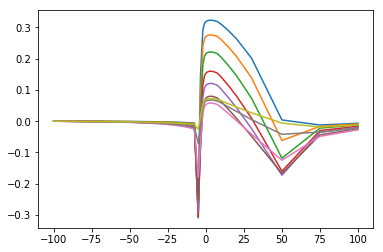

In [844]:
ths = (0.25,0.5)
wt = wdti(i,ths,tinh = -100.0)
for g in [50,70,100,150,200,300,500,1000,1500]:
    rp = stdpalt(wt,gd = g,gp=300,n=100)
    plot(wt[:,0],rp)
